In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [2]:
df = pd.read_csv('Datasets/heart.csv')

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
df_dup = df.duplicated().any()
df_dup

True

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(302, 14)

In [7]:
df_dup = df.duplicated().any()
df_dup

False

In [8]:
cat_val = []
cont_val = []

for columns in df.columns:
    if df[columns].nunique() <= 10:
        cat_val.append(columns)
    else:
        cont_val.append(columns)

In [9]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [12]:
df.cp.unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
cat_val.remove('sex')
cat_val.remove('target')


df = pd.get_dummies(df, columns=cat_val, drop_first=True, dtype=int)

In [15]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [16]:
st = StandardScaler()
df[cont_val] = st.fit_transform(df[cont_val])

In [17]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:
X = df.drop('target', axis=1)
y = df['target']


In [19]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [22]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
109,-0.046555,1,-1.232023,-0.783855,-1.817996,-0.899544,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
47,1.281911,0,2.646092,-0.358057,0.674834,-0.037124,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1
434,-1.485726,0,-1.117961,0.416120,0.980971,-0.899544,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
376,0.506972,1,0.478910,-0.493538,0.631100,-0.899544,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,-1.375021,1,-0.661712,-0.125804,1.943116,-0.209608,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
521,0.396267,1,-0.376556,-0.512893,-0.243577,-0.554576,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
105,-0.821493,1,-1.232023,0.551602,-1.380658,-0.037124,0,0,0,0,...,1,1,0,1,0,0,0,0,1,0
91,0.839089,0,-0.433587,-0.725791,0.587366,-0.899544,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
y_train

109    0
47     0
434    1
733    1
376    1
      ..
210    1
521    1
105    0
91     1
270    1
Name: target, Length: 241, dtype: int64

In [24]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
299,-0.267966,1,-0.661712,1.519323,0.980971,-0.727060,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
12,-2.260664,0,-0.775774,-0.706437,1.855648,-0.295850,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
582,0.064151,1,-0.091401,0.299994,0.237495,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
720,1.060500,1,0.478910,1.712868,0.368697,-0.899544,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,-0.157260,0,-0.091401,0.338703,-0.287311,-0.554576,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
369,-0.378671,1,-1.232023,-1.383842,-1.161988,-0.382092,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
76,-0.710788,1,-0.433587,0.164513,1.112172,-0.899544,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
154,0.949794,1,-0.091401,1.616096,-0.768384,0.652812,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1


In [25]:
y_test

299    1
12     1
582    1
720    0
66     1
      ..
320    1
369    1
76     1
154    0
719    1
Name: target, Length: 61, dtype: int64

In [26]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred1)

0.8360655737704918

In [31]:
svm = svm.SVC()

In [32]:
svm.fit(X_train, y_train)

SVC()

In [33]:
y_pred2 = svm.predict(X_test)


In [34]:
accuracy_score(y_test, y_pred2)

0.7540983606557377

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)

accuracy_score(y_test, y_pred3)

0.7377049180327869

In [36]:
score = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))

In [37]:
score

[0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.8032786885245902,
 0.7868852459016393,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.819672131147541,
 0.819672131147541,
 0.8032786885245902,
 0.8032786885245902,
 0.7868852459016393,
 0.819672131147541,
 0.786885245901639

In [38]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8360655737704918

In [39]:
df = pd.read_csv('Datasets/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
df = df.drop_duplicates()

In [41]:
X = df.drop('target', axis=1)
y = df['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred4 = dt.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred4)

0.7704918032786885

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred5 = rf.predict(X_test)

accuracy_score(y_test, y_pred5)

0.8524590163934426

In [48]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)

y_pred6 = gr.predict(X_test)

accuracy_score(y_test, y_pred6)

0.8032786885245902

In [49]:
final_data = pd.DataFrame({'Model':['log','svm','knn','dt','rf','gr'], 
                           "ACC":[accuracy_score(y_test, y_pred1),
                                  accuracy_score(y_test, y_pred2),
                                  accuracy_score(y_test, y_pred3),
                                  accuracy_score(y_test, y_pred4),
                                  accuracy_score(y_test, y_pred5),
                                  accuracy_score(y_test, y_pred6)]})

In [50]:
final_data

,Model,ACC
0,log,0.475410
1,svm,0.524590
2,knn,0.475410
3,dt,0.770492
4,rf,0.852459
5,gr,0.803279


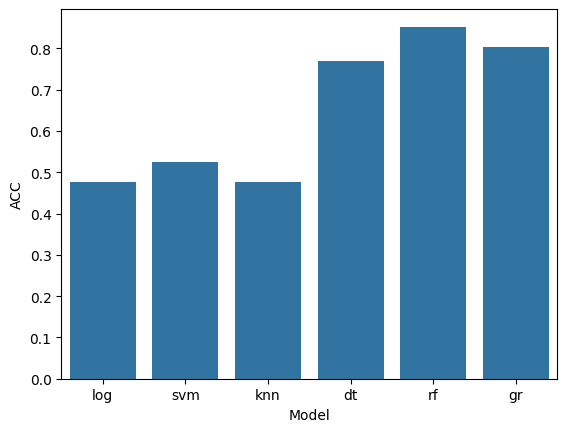

In [57]:
sns.barplot(x='Model',y='ACC', data=final_data)
plt.show()

In [58]:
X = df.drop('target', axis=1)
y = df['target']

In [61]:
X.shape

(302, 13)

In [62]:
rf.fit(X, y)

RandomForestClassifier()

In [63]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [64]:
new_df = pd.DataFrame({
    'age'       :52,
    'sex'       :1,
    'cp'        :0,
    'trestbps'  :125,
    'chol'      :212,
    'fbs'       :0,
    'restecg'   :1,
    'thalach'   :168,
    'exang'     :0,
    'oldpeak'   :1,
    'slope'     :2,
    'ca'        :2,
    'thal'      :3,
    'target'    :0  
}, index=[0])

In [65]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1,2,2,3,0


In [67]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define new_df with the same column names and in the correct format
new_df = pd.DataFrame({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],
    'chol': [212],
    'fbs': [0],
    'restecg': [1],
    'thalach': [168],
    'exang': [0],
    'oldpeak': [1],
    'slope': [2],
    'ca': [2],
    'thal': [3],
    'target': [0]  # This column is optional and can be omitted for prediction
})

# Assuming rf is your trained RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  # Make sure X_train and y_train are your training data

# Predict using the trained model
predictions = rf.predict(new_df.drop('target', axis=1))  # Drop target column if it's included

print(predictions)


[0]


In [70]:
joblib.dump(rf, 'joblib/heart_disease_joblib')

['heart_disease_joblib']